In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import json
import numpy as np
import functools
from matplotlib import rc
rc('text', usetex=True)
sns.set(font='serif', style='white')
def movingaverage(data, window_width=10):
    cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
    ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
    return list(ma_vec)

### 16 node network real graph

[1631.8875, 1645.7, 1653.61875, 1658.228125]


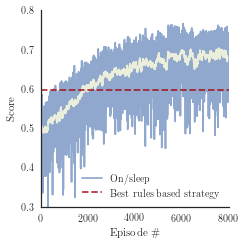

In [2]:
#with open('tmp/rewardgvedu_graphmodelv7slower.json') as f:
#    v7 = json.load(f)
#with open('tmp/rewardgiujh_graphmodelv9_1e-5_256.json') as f:
#    v9 = json.load(f)
#with open('tmp/rewardgiujh_graphmodelv9_1e-5_256_5000+.json') as f:
#    v9b = json.load(f)
#with open('tmp/rewardyydoj_graphmodelv10.json') as f:
#    v10 = json.load(f)
#with open('tmp/rewardecaeo_graphmodelv11.json') as f:
#    v11 = json.load(f)
#with open('tmp/rewardwsnva_graphmodelv12_quicker.json') as f:
#    v12 = json.load(f)
#with open('tmp/rewardbybav_gridv0.json') as f:
#    gridv0 = json.load(f) #256
#with open('tmp/rewardrsqcb_gridv2.json') as f:
#    gridv2 = json.load(f) #512 didnt save stupidly
#with open('tmp/rewardnniwn_gridv3.json') as f:
#    gridv3 = json.load(f)#quicker 1e-4 512
with open('tmp/rewardyurxg_gridv1.json') as f:
    gridv1a = json.load(f)
with open('tmp/rewardoulck_originalv1.json') as f:
    likev1 = json.load(f)

#with open('tmp/rewardjpzxe_roughv1.json') as f:
#    roughv1 = json.load(f)
#with open('tmp/rewardhaviv_roughbadv1.json') as f:
#    roughbadv1 = json.load(f)

with open('tmp/rewardjraok_badv3.json') as f:
    roughbadv3 = json.load(f)
with open('tmp/rewardykcvd_originalv3.json') as f:
    likev3 = json.load(f)
with open('tmp/rewardxhlnb_directgoodv0.json') as f:
    directv0 = json.load(f)
with open('tmp/rewarddwgva_directgoodv1.json') as f:
    directv1 = json.load(f)#32x32
with open('tmp/rewardztuvj_directbadv0.json') as f:
    directbadv0 = json.load(f)
with open('tmp/rewardfogdm_direct_rewardv0.json') as f:
    direct_rewardfixeda = json.load(f)
with open('tmp/rewardfogdm_direct_rewardv0b.json') as f:
    direct_rewardfixedb = json.load(f)
with open('tmp/rewardfogdm_direct_rewardv0c.json') as f:
    direct_rewardfixedc = json.load(f)
direct_rewardfixed = direct_rewardfixeda['data'][1::]+ direct_rewardfixedb['data'][1::]+direct_rewardfixedc['data'][1::]
with open('tmp/rewardyodea_threev0.json') as f:
    threev0a = json.load(f)
with open('tmp/rewardyodea_threev0b.json') as f:
    threev0b = json.load(f)
threev0 = threev0a['data'][1::]+ threev0b['data'][1::]

#gridv1 = gridv1a['data'][1::]+ gridv1b['data'][1::]+gridv1c['data'][1::]
#v9 = v9['data'][1::]+v9b['data'][1::]
fig,ax = plt.subplots(1)
fig.set_size_inches(3.5,3.5)
xmax = 8050
xmin = 0

#ax.plot(gridv1a['data'][1::], linestyle = '-', alpha=0.82, label ='Learning curve')
#ax.plot(likev1['data'][1::], linestyle = '-', alpha=0.82, label ='control')
#ax.plot(roughbadv3['data'][1::], linestyle = '-', alpha=0.82, label='bad')
#ax.plot(likev3['data'][1::], linestyle = '-', alpha=0.82, label='new replay')
#ax.plot(directv0['data'][1::], linestyle = '-', alpha=0.82, label='direct')
#ax.plot(directbadv0['data'][1::], linestyle = '-', alpha=0.82, label='direct bad')
#ax.plot(directv1['data'][1::], linestyle = '-', alpha=0.82, label='direct small')
ax.plot([i/2400 for i in direct_rewardfixed],linestyle = '-', alpha=0.62, label='On/sleep')
ax.plot([i/2400 for i in movingaverage(direct_rewardfixed,50)],linestyle = '-', alpha=0.82, color='#ffffdd')
#ax.plot(threev0,linestyle = '-', alpha=0.92, label='On/sleep/off')

#ax.plot(roughv1['data'][1::], linestyle = '-', alpha=0.82, label ='rough')
#ax.plot(roughbadv1['data'][1::], linestyle = '-', alpha=0.82, label ='rough bad')
#ax.plot(movingaverage(gridv1a['data'][1::], window_width=20),linestyle = '-', linewidth=2,alpha=0.92, color='#d9d9d9')
#ax.plot(movingaverage(likev3['data'][1::], window_width=20),linestyle = '-', linewidth=2,alpha=0.92, color='#ffffff')
#ax.plot(movingaverage(roughbadv3['data'][1::], window_width=20),linestyle = '-', linewidth=2,alpha=0.92, color='#d9d9d9')

#ax.plot([xmin,xmax],[1730, 1730], label='manual', linestyle = '--', alpha=0.85)
#ax.plot([xmin,xmax],[1050, 1050], label='Random strategy',linestyle = ':', alpha=0.85,color='#a50f15')

ax.plot([xmin,xmax],[1429/2400, 1429/2400], label='Best rules based strategy',
        linestyle = '--', alpha=0.85,color='#a50f15')
#ax.plot([xmin,xmax],[1335, 1335],
#3        linestyle = '--', alpha=0.85,color='#a50f15')
#ax.plot([xmin,xmax],[1556, 1556],
#        linestyle = '--', alpha=0.85,color='#a50f15')
#ax.plot([xmin,xmax],[1388, 1388], label='Best rules based bad strategy',
#        linestyle = '--', alpha=0.85,color='#a50f15')
ax.set_xlim([xmin, xmax])
#ax.set_yscale('log')
ax.set_xlabel("Episode \#")
ax.set_ylabel("Score")
ax.legend(loc='lower right')
#ax.set_yticks([200*i for i in range(12)])
#ax.set_yticklabels([round(i/2400,2) for i in ax.get_yticks()])
ax.set_ylim([0.3,0.8])

sns.despine()
fig.tight_layout()
#fig.savefig('learningcurve.png', format='png', dpi=600)
print(movingaverage(direct_rewardfixed,20)[-4:])


In [3]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

### Summary ###
|data|seen|unseen|
|---:|---:|---:|
|learned|1525|1473|
|baseline|1406|1386|

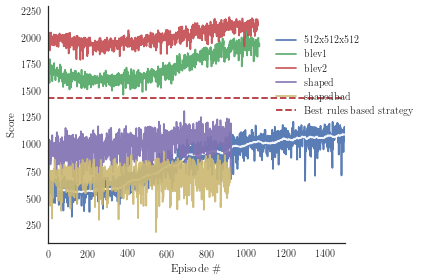

In [16]:
xmax = 1500
xmin = 000
with open('tmp/rewardcuysq_threev3.json') as f:
    threev3a = json.load(f)['data'][1::]
with open('tmp/rewardcuysq_threev3b.json') as f:
    threev3b = json.load(f)['data'][1::]
with open('tmp/rewardcuysq_5000_threev3b_noupdate.json') as f:
    threev3b_noupdate = json.load(f)['data'][1::]
with open('tmp/rewardcuysq_trymore_threev3c.json')as f:#('tmp/rewardcuysq_threev3c.json') as f:
    threev3c = json.load(f)['data'][1::]
with open('tmp/rewardcuysq_6000_threev3c_noupdate.json') as f:
    threev3c_noupdate = json.load(f)['data'][1::]
with open('tmp/rewardcuysq_6000_threev3d.json') as f:
    threev3d = json.load(f)['data'][1::]
threev3 = threev3a+threev3b+threev3c#+threev3d#_noupdate#+threev3c#_noupdate
with open('tmp/rewardbchvk_threev2.json') as f:
    threev2a = json.load(f)
with open('tmp/rewardbchvk_threev2b.json') as f:
    threev2b = json.load(f)#256x256x256
threev2 = threev2a['data'][1::]+threev2b['data'][1::]
with open('tmp/rewardhkjjp_badv0.json') as f:
    badv0 = json.load(f)
with open('tmp/rewardbqxsx_badv1_deltat1.json') as f:
    badv1 = json.load(f)['data'][1::]
with open('tmp/rewardumjtx_badv3_deep.json') as f:#rewardveppc_badv3_deep.json') as f:update frequency 256
    badv3 = json.load(f)['data'][1::]#512x512x512 
with open('tmp/rewardtyrlg_badv4.json') as f:
    badv4 = json.load(f)['data'][1::]#256x256x256
with open('tmp/rewardidoyr_badv5.json') as f:
    badv5 = json.load(f)['data'][1::]#512x512x512
with open('tmp/rewardytjhb_blev1.json') as f:
    blev1 = json.load(f)['data'][1::]
with open('tmp/rewardcbclz_blev2.json') as f:
    blev2 = json.load(f)['data'][1::]
with open('tmp/rewarduqrqw_shapedgoodv1.json') as f:
    shapedv1 = json.load(f)['data'][1::] 
with open('tmp/rewardvbwnc_shapedbadv1.json') as f:
    shapedbadv1 = json.load(f)['data'][1::]
fig,ax = plt.subplots(1)
#diff = [(v2-v0) for v2,v0 in zip(threev2,threev0)]
#ax.plot(direct_rewardfixed,linestyle = '-', alpha=0.92, label='On/sleep/off')
ax.plot(threev3,linestyle = '-', alpha=0.92, label='512x512x512') #1429
#ax.plot(threev0,linestyle = '-', alpha=0.92, label='512x512')
#ax.plot(badv0['data'][1::],linestyle = '-', alpha=0.92, label='Bad')#1205 target
#ax.plot(10*[np.nan]+movingaverage(badv0['data'][1::],10),linestyle = '-', alpha=0.92, color='#ffffff')
#ax.plot(badv1,linestyle = '-', alpha=0.92, label='badv1')#1315 target
#ax.plot(badv2,linestyle = '-', alpha=0.92, label='badv2')#1315 target updating regularly
#ax.plot(badv4,linestyle = '-', alpha=0.92, label='badv4')#1205 maybe?
#ax.plot(badv5,linestyle = '-', alpha=0.92, label='badv5')#1205 maybe?
#ax.plot(50*[np.nan]+movingaverage(badv5,50),linestyle = '-', alpha=0.92, color='#ffffff')

ax.plot(50*[np.nan]+movingaverage(threev3,50),linestyle = '-', alpha=0.92, color='#ffffff')
ax.plot(blev1,linestyle = '-', alpha=0.92, label='blev1') #512x512 bad twooption target 1629
ax.plot(blev2,linestyle = '-', alpha=0.92, label='blev2') #512x512 bad twooption target 2000
ax.plot(shapedv1,linestyle = '-', alpha=0.92, label='shaped') #1053
ax.plot(shapedbadv1,linestyle = '-', alpha=0.92, label='shapedbad') #1053

#ax.plot(threev0,linestyle = '-', alpha=0.92, label='512x512x512')
ax.plot([xmin,xmax],[1435, 1435], label='Best rules based strategy',
        linestyle = '--', alpha=0.85,color='#a50f15')
#ax.plot(movingaverage(diff))
#print(movingaverage(diff)[-10:])
#ax.plot(threev0)
ax.set_xlabel("Episode \#")
ax.set_ylabel("Score")
ax.set_xlim([xmin, xmax])
#ax.set_ylim([700,1500])
ax.legend(bbox_to_anchor =(1,0.5))
sns.despine()
fig.tight_layout()

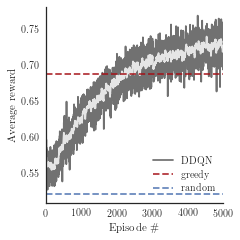

In [337]:
fig, ax = plt.subplots(1)
fig.set_size_inches(3.5,3.5)
xmin,xmax= 0,5000
def avg(s):
    return [i/2400 for i in s]
ax.plot(avg(gridv1a['data'][1::]), linestyle = '-', alpha=0.82, label ='DDQN', color='#525252')
ax.plot(avg(movingaverage(gridv1a['data'][1::],20)), linestyle = '-', alpha=0.82, color='#ffffff')

ax.plot([xmin,xmax],avg([1650, 1650]), label='greedy',
        linestyle = '--', alpha=0.85,color='#a50f15')
ax.plot([xmin,xmax],avg([1250, 1250]), label='random',
        linestyle = '--', alpha=0.85)
ax.set_xlim([xmin, xmax])
#ax.set_yscale('log')
ax.set_xlabel("Episode \#")
ax.set_ylabel("Average reward")
ax.legend(loc='best')
#ax.set_yticks([200*i for i in range(12)])
#ax.set_yticklabels([round(i/2400,2) for i in ax.get_yticks()])
#ax.set_ylim([1000,1900])

sns.despine()
fig.tight_layout()
fig.savefig('learningcurve.png', format='png', dpi=600)

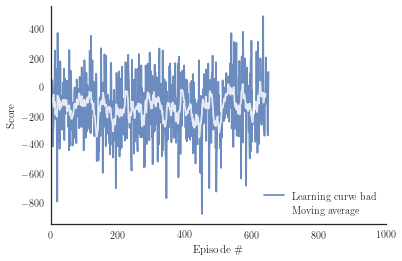

In [55]:
with open('tmp/rewardooyls_month9badv0.json') as f:
    month9v0_bad = json.load(f)
with open('tmp/rewardcynsr_month9goodv0.json') as f:
    month9v0_good = json.load(f)
fig, ax = plt.subplots(1)
toplot = month9v0_bad
#toplot = month9v0_good

#ax.plot(month9v0_good['data'][1::], linestyle = '-', alpha=0.82, label ='Learning curve good')
ax.plot(toplot['data'][1::], linestyle = '-', alpha=0.82, label ='Learning curve bad')
ax.plot(movingaverage(toplot['data'][1::],10), linestyle = '-', color='#ffffff',alpha=0.82, label ='Moving average')

xmin=0
xmax=1000
ax.set_xlim([xmin, xmax])
#ax.set_yscale('log')
ax.set_xlabel("Episode \#")
ax.set_ylabel("Score")
ax.legend(loc='best')
sns.despine()

### 2 node network real solar data

216.0 487.0 -666.0 860
136.5 402.0 -785.5


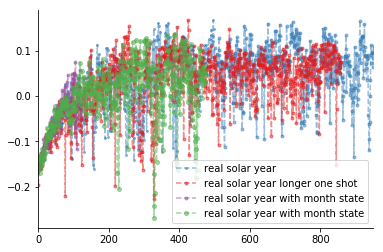

In [229]:
with open('tmp/rewardjyxgi_realsolar_2node_fullyear_bignetwork.json') as f:
    rewardtrace = json.load(f)
with open('tmp/rewardjyxgi_realsolar_2node_fullyear_additional250episodes_epsiloninit0.1.json') as f:
    second_bout = json.load(f)
with open('tmp/rewardjyxgi_realsolar_2node_fullyear_secondadditional250episodes_epsiloninit0.1.json') as f:
    third_bout = json.load(f)
with open('tmp/rewardspoxo_realsolar_2node_fullyear_1000episodes_32experiencereplay.json') as f:
    oneshot = json.load(f)
with open('tmp/rewardxadde_realsolar_2node_fullyear_1000episodes_8experiencereplay.json') as f:
    oneshot8 = json.load(f)
with open('tmp/rewardfpdnp_2node_fullyear_monthinstatespace_replay8.json') as f:
    withseason = json.load(f)
with open('tmp/rewardjxqsi_2node_fullyear_monthinstatespace_replay8.json') as f:
    withseason2 = json.load(f)
fig, ax = plt.subplots(1)
one = len(rewardtrace['data'])
two = len(second_bout['data'])
three = len(third_bout['data'])
ax.plot([i/(365*8) for i in rewardtrace['data'][1::]], label='real solar year',
        alpha=0.5, marker='o', linestyle='--', markersize=2,c ='#377eb8')
ax.plot(range(one, one+two-1),[i/(365*8) for i in second_bout['data'][1::]],
        alpha=0.5, marker='o', linestyle='--', markersize=3,c='#377eb8')
ax.plot(range(one+two, one+two+three-1),[i/(365*8) for i in third_bout['data'][1::]],
        alpha=0.5, marker='o', linestyle='--', markersize=3,c='#377eb8')
ax.plot([i/(365*8) for i in oneshot8['data'][1::]], label='real solar year longer one shot',
        alpha=0.5, marker='o', linestyle='--', markersize=3,c='#e41a1c')
ax.plot([i/(365*8) for i in withseason['data'][1::]], label='real solar year with month state',
        alpha=0.5, marker='o', linestyle='--', markersize=3,c='#984ea3')
ax.plot([i/(365*8) for i in withseason2['data'][1::]], label='real solar year with month state',
        alpha=0.5, marker='o', linestyle='--', markersize=4,c="#4daf4a")
sns.despine()
ax.set_xlim([0,950])
ax.legend(loc='lower right')
#print(max(rewardtrace['data']), max(third_bout['data']), len(third_bout['data']))
print(oneshot8['data'][-1], max(oneshot8['data']), min(oneshot8['data'][100::]), len(oneshot8['data']))
print(withseason2['data'][-1], max(withseason2['data'][1::]), min(withseason2['data'][100::]))

### 4 node network stationary solar

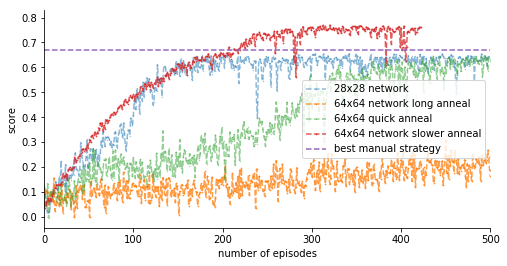

In [66]:
with open('tmp/rewardpavor_500_episodes_ddq_4nodes_slowerlearning.json') as f:
    trace = json.load(f)
with open('tmp/rewardarcyn_5000_episodes_month.json') as f:
    trace2 = json.load(f)
with open('tmp/rewardaeixz_fastdecayandslowlearning_bigger.json') as f:
    trace3 = json.load(f)
with open('tmp/rewardkcgdm_0.99995_decayrate.json') as f:
    trace4 = json.load(f)
with open('tmp/rewardtofyb_full year.json') as f:
    trace5 = json.load(f)
fig, ax = plt.subplots(1)
fig.set_size_inches(8,4)
ax.plot([i/(28*8) for i in trace['data'][1::]], label='28x28 network',
        alpha=0.5, marker='o', linestyle='--', markersize=0.4)
ax.plot([i/(28*8) for i in trace2['data'][1::]], label='64x64 network long anneal',
        alpha=0.75, marker='o', linestyle='--', markersize=0.8)
ax.plot([i/(28*8) for i in trace3['data'][1::]], label='64x64 quick anneal', 
        alpha=0.5, marker='o', linestyle='--', markersize=0.4)
#ax.plot([i/(28*8) for i in trace4['data'][1::]], label='bigger network slower anneal',
#        alpha=0.5, marker='o', linestyle='--', markersize=0.4)
ax.plot([i/(365*8) for i in trace5['data'][1::]], label='64x64 network slower anneal', 
        alpha=0.75, marker='o', linestyle='--', markersize=0.8)
ax.plot([0,5000],[150/(28*8), 150/(28*8)], label='best manual strategy', linestyle='--')
#ax.plot(trace4['data'][1::], label='not trimmed q learning with time')
ax.set_xlim([0,500])
ax.set_xlabel('number of episodes')
ax.set_ylabel('score')
ax.legend(loc='best')
sns.despine()


[15840, 16320]


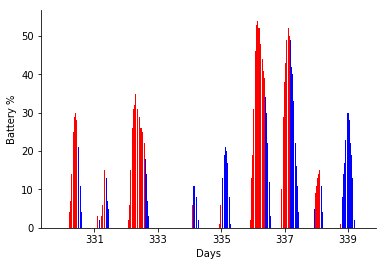

In [18]:
#with open('tmp/dtoei_testingonunseenyear.json') as f:
fig, ax = plt.subplots(1)
def test(i):
    i['S0'][0]==2
def get_plottable(i):
    return i['S0'][1]
sensor = 'S1'
batts = np.array([i[sensor][1] for i in data], dtype=float)
statuses =  np.array([i[sensor][0] for i in data])
onbatts = np.copy(batts)
offbatts = np.copy(batts)
offbatts[statuses!=2] = np.nan
onbatts[statuses==2] = np.nan
ax.bar(xs,onbatts,color='b')
ax.bar(xs,offbatts,color='r')
#ax.plot(offbatts, c='r')
#ax.plot(get_plottable(data))
#ax.set_xlim([0,337])
ax.set_ylabel('Battery %')
ax.set_xticklabels([int(x/48) for x in ax.get_xticks()])
ax.set_xlabel('Days')
ax.set_ylabel('Battery %')
sns.despine()

In [51]:
#debugging


144

In [17]:
import solar_sensor_env,math

In [18]:
step_number = solar_sensor_env.random_start_generator(3)
print(step_number)

2472


In [19]:
day_number = math.floor(step_number/(24/3))

In [25]:
day_number

309

In [21]:
2472/8

309.0

In [27]:
season_number = math.floor(day_number/30)

In [28]:
season_number

10

In [29]:
309/12

25.75

In [31]:
365/31

11.774193548387096

In [62]:
import calendar

In [63]:
monthdays = [calendar.monthrange(2018,i)[1] for i in range(1,13)]

In [67]:
cumulative = np.cumsum(monthdays)
withzero = [0]+list(cumulative)
list(zip(cumulative, cumulative[1::]))

[(31, 59),
 (59, 90),
 (90, 120),
 (120, 151),
 (151, 181),
 (181, 212),
 (212, 243),
 (243, 273),
 (273, 304),
 (304, 334),
 (334, 365)]

In [72]:
def daynumber_to_monthnumber(daynumber):
    monthdays = [calendar.monthrange(2018,i)[1] for i in range(1,13)]
    cumulative = np.cumsum(monthdays)
    cumulative = [0]+list(cumulative)
    monthpairs = zip(cumulative, cumulative[1::])
    return next(idx for idx, el in enumerate(monthpairs) if daynumber in range(*el))

In [75]:
daynumber_to_monthnumber(32)

1